In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
!pip install scipy
from scipy.optimize import curve_fit

/tmp/ipykernel_4075966/993423204.py:61: UserWarning: The figure layout has changed to tight
  fig.tight_layout()


'created' timestamp seems very low; regarding as unix timestamp


'modified' timestamp seems very low; regarding as unix timestamp


'created' timestamp seems very low; regarding as unix timestamp


'modified' timestamp seems very low; regarding as unix timestamp


'created' timestamp seems very low; regarding as unix timestamp


'modified' timestamp seems very low; regarding as unix timestamp


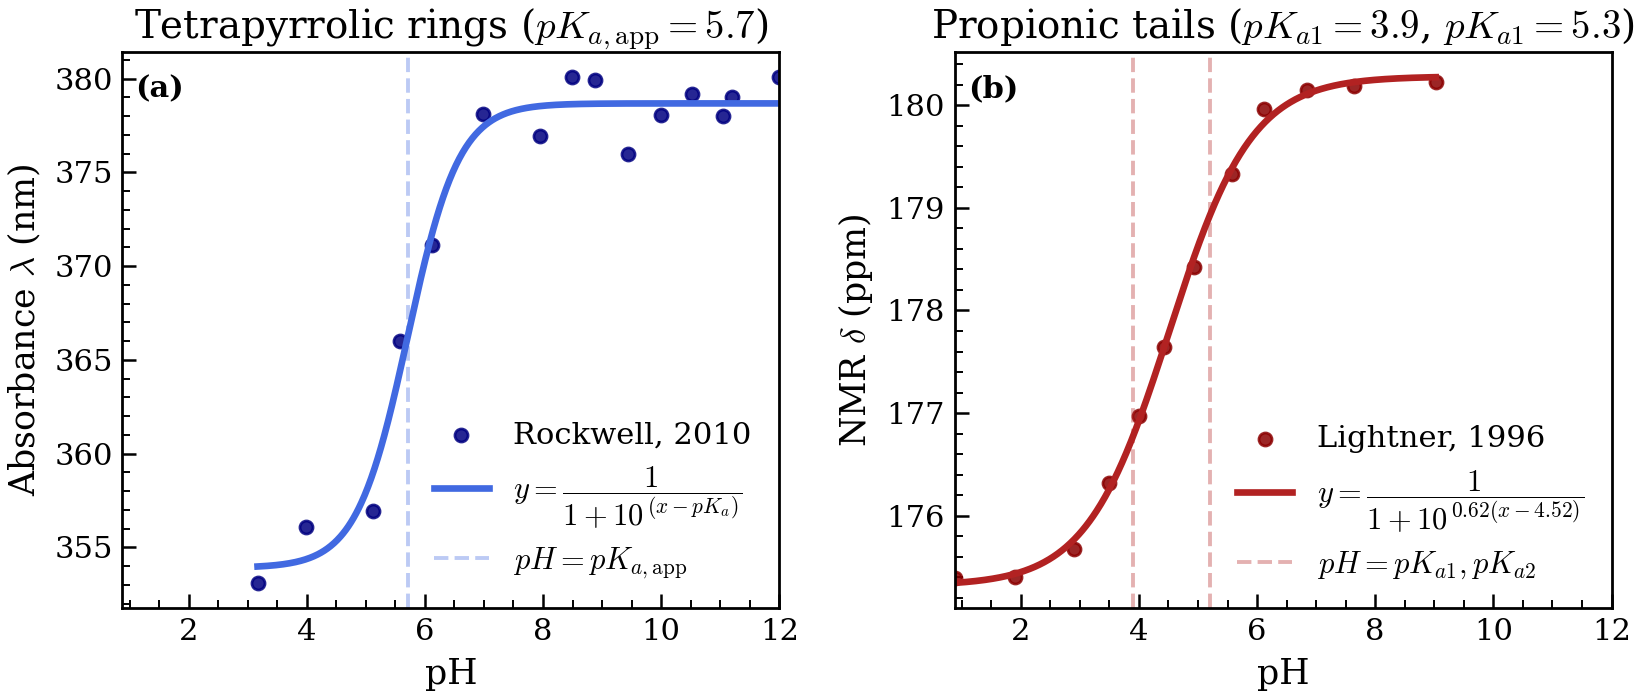

In [3]:
ring = np.genfromtxt('../input/experimental-titration-curves/ring-macro-curve.csv', delimiter=',', skip_header=True)
tail = np.genfromtxt('../input/experimental-titration-curves/tails-macro-curve.csv', delimiter=',')

# Standard Hill/Langmuir-type forms with flexible amplitude
f = lambda x, pka, ymin, ymax: ymin + (ymax - ymin) / (1 + 10**(x - pka))
g = lambda x, n, pka, ymin, ymax: ymin + (ymax - ymin) / (1 + 10**(n * (x - pka)))

# --- Fit ring data (raw y)
popt_ring, _ = curve_fit(
    f, ring[:,0], ring[:,1],
    p0=[5, np.min(ring[:,1]), np.max(ring[:,1])]
)
pkar, ymin_r, ymax_r = popt_ring

# --- Fit tail data (raw y)
popt_tail, _ = curve_fit(
    g, tail[:,0], tail[:,1],
    p0=[1, 5, np.min(tail[:,1]), np.max(tail[:,1])]
)
n, pkat, ymin_t, ymax_t = popt_tail

plt.style.use("rotskoff_notebook.mplstyle")

fig, axes = plt.subplots(1, 2, figsize=(8.5, 3.8), sharey=False)

# --- Ring subplot (blue)
x_ring = np.linspace(ring[:,0].min(), ring[:,0].max(), 800)
y_ring_fit = f(x_ring, pkar, ymin_r, ymax_r)

axes[0].scatter(ring[:,0], ring[:,1], s=22, color="navy", alpha=0.85, label="Rockwell, 2010")
axes[0].plot(x_ring, y_ring_fit, color="royalblue", lw=2.4, label=r"$y = \dfrac{1}{1 + 10^{\, (x - pK_a)}}$")
axes[0].axvline(pkar, ls="--", color="royalblue", alpha=0.35, label=f"$pH=pK_{{a,\mathrm{{app}}}}$")
axes[0].set_xlabel("pH")
axes[0].set_ylabel(f"Absorbance $\lambda$ (nm)")
axes[0].set_title(rf"Tetrapyrrolic rings ($pK_{{a,\mathrm{{app}}}} = {pkar:.1f}$)")
# (a) label inside the axis
axes[0].text(0.02, 0.96, "(a)", transform=axes[0].transAxes, va="top", ha="left",
             fontsize=11, fontweight="bold")

# --- Tail subplot (red)
x_tail = np.linspace(tail[:,0].min(), tail[:,0].max(), 800)
y_tail_fit = g(x_tail, n, pkat, ymin_t, ymax_t)

axes[1].scatter(tail[:,0], tail[:,1], s=22, color="darkred", alpha=0.85, label="Lightner, 1996")
axes[1].plot(x_tail, y_tail_fit, color="firebrick", lw=2.4, label=rf"$y = \dfrac{{1}}{{1 + 10^{{\,{n:.2f}(x - {pkat:.2f})}}}}$")
axes[1].axvline(3.9, ls="--", color="firebrick", alpha=0.35)
axes[1].axvline(5.2, ls="--", color="firebrick", alpha=0.35, label=f"$pH=pK_{{a1}}, pK_{{a2}}$")
axes[1].set_xlabel("pH")
axes[1].set_ylabel(f"NMR $\delta$ (ppm)")
axes[1].set_title(f"Propionic tails ($pK_{{a1}} = 3.9$, $pK_{{a1}} = 5.3$)")
# (b) label inside the axis
axes[1].text(0.02, 0.96, "(b)", transform=axes[1].transAxes, va="top", ha="left",
             fontsize=11, fontweight="bold")

# --- Layout / style
for ax in axes:
    ax.set_xlim(min(ring[:,0].min(), tail[:,0].min()),
                max(ring[:,0].max(), tail[:,0].max()))
    ax.legend(frameon=False, loc="lower right")

fig.tight_layout()

# save as high-quality PNG
plt.savefig("../reports/bv_ring_tail_split.png", dpi=300, bbox_inches="tight", pad_inches=0.05)

# also save as vector PDF (great for publications)
plt.savefig("../reports/bv_ring_tail_split.pdf", bbox_inches="tight", pad_inches=0.05)

#plt.show()